# **Boston Housing Dataset**

Este conjunto de datos contiene información recopilada por el Servicio de Censos de EE. UU. Con respecto a la vivienda en el área de Boston Mass. Se ha utilizado ampliamente en todo la literatura para comparar algoritmos. Sin embargo, estas comparaciones se realizaron principalmente fuera de Delve y, por lo tanto, son algo sospechosas. El conjunto de datos es pequeño con solo 506 casos.

Hay **14** atributos en cada caso del conjunto de datos. Ellos son:

+ **CRIM:** Tasa de criminalidad per capita por ciudad.
+ **ZN:** Proporcion de terreno residencial dividido en zonas para lotes de mas de 25.000 pies cuadrados.
+ **INDUS:** Proporcion de acres comerciales no minoristas por ciudad.
+ **CHAS:** Variables dummy de Charles River (1 si el tramo limita con el río; 0 de lo contrario).
+ **NOX:** Concentracion de oxidos de nitrogeno (parte por 10 millones).
+ **RM:** Numeros medio de habitaciones por vivienda.
+ **AGE:** Proporcion de unidades ocupadas por sus propietarios construidas antes de 1940.
+ **DIS:** Media ponderada de las distancias a cinco centros de empleo de Boston.
+ **RAD:** Indice de accebilidad a carreteras radiales.
+ **TAX:** Tasa de impuesto a la propiedad de valor total por 10.000 dolares
+ **PTratio:** Proporcion alumno-profesor por ciudad
+ **B:** 1000(Bk-0.63)^2 donde Bk es la proporcion de negros por ciudad
+ **LSTAT:** Estatus mas bajo de la poblacion (porcentaje)
+ **MEDV:** Valor medio de las viviendas ocupadas por sus propietarios en 100 dolares


    

## **Lectura de los Datos**
Importamos las librerias que utilizaremos para el procesamiento de los datos.


In [1]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from __future__ import absolute_import, division, print_function
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from pandas import read_csv

Importamos los datos.

In [2]:
boston='C:/Users/Alejandro/Desktop/Mineria/Proyecto/GitHub/Tareas/Regresion-Clasificacion/housing.csv'
columna=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTratio','B','LSTAT','MEDV']
datos=pd.read_csv(boston,header=None,names=columna,delimiter=r"\s+")
datos.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTratio,B,LSTAT,MEDV
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


## **Analisis Descriptivo de los Datos**
Verificamos que no tengamos datos faltantes en el dataset.

In [3]:
print('Datos Faltantes:\n', datos.isna().sum())

Datos Faltantes:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTratio    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Revisamos las estadisticas generales de los datos de entrenamiento.

In [4]:
training=datos.sample(frac=0.8,random_state=0)
test=datos.drop(training.index)
data=training.describe()
data=data.transpose()
print(data)

         count        mean         std        min        25%        50%  \
CRIM     405.0    3.670339    8.977954    0.00632    0.08265    0.26838   
ZN       405.0   11.067901   22.688396    0.00000    0.00000    0.00000   
INDUS    405.0   11.097951    6.699157    0.74000    5.32000    9.69000   
CHAS     405.0    0.069136    0.253999    0.00000    0.00000    0.00000   
NOX      405.0    0.553098    0.115564    0.38500    0.44900    0.53800   
RM       405.0    6.269768    0.690552    3.56100    5.87800    6.19300   
AGE      405.0   68.241975   27.908527    2.90000   45.00000   76.50000   
DIS      405.0    3.834098    2.162173    1.12960    2.07880    3.27210   
RAD      405.0    9.474074    8.618564    1.00000    4.00000    5.00000   
TAX      405.0  405.839506  164.057951  187.00000  284.00000  334.00000   
PTratio  405.0   18.437037    2.141275   12.60000   17.30000   18.80000   
B        405.0  356.276444   91.298597    2.60000  375.21000  391.23000   
LSTAT    405.0   12.63891

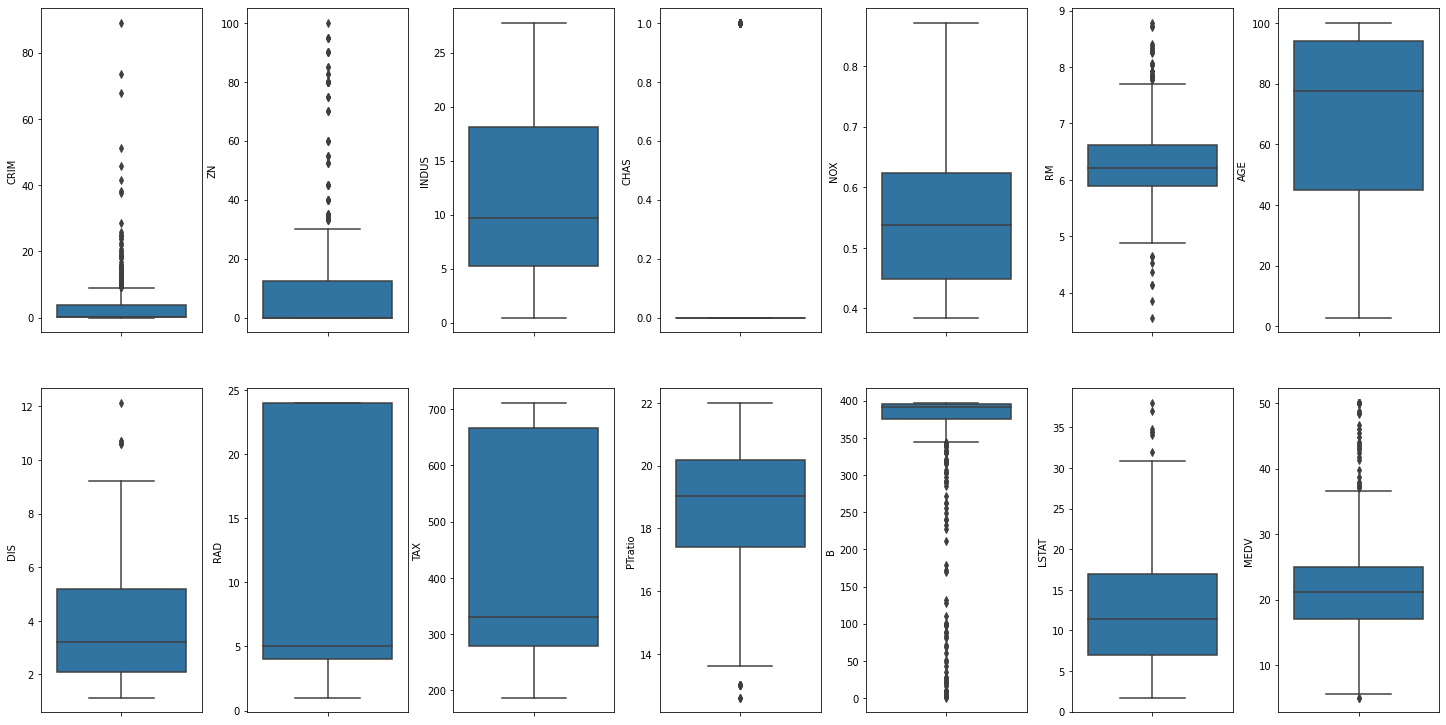

In [5]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in datos.items():
    sns.boxplot(y=k, data=datos, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Si revisamos los datos anteriores, podemos analizar algunos valores importantes de las variables tratadas:
+ Valor promedio de la vivienda es de 22.476 dolares.
+ El valor de las viviendas oscila entre 5.000 y 50.000 dolares.
+ Son muy pocas las zonas residenciales con lotes de mas 250.000 pies cuadrados
+ La tasa de criminalidad es muy baja.
+ Las viviendas en promedio cunetan con 6 habitaciones.
+ La proporcion de casas antiguas es bastante alta, en promedio el 68% de las viviendas fueron contruidas antes de 1940.
+ La concetividad a las vias principales es muy variable, aunque el promedio de viviendas cuentan con un acceso a las vias mediocre.

## **Matriz de Correlacion**

Veamos la relacion que hay entre las variables, en especial, como estan relacionadas con la variable respuesta *MEDV*

<AxesSubplot:>

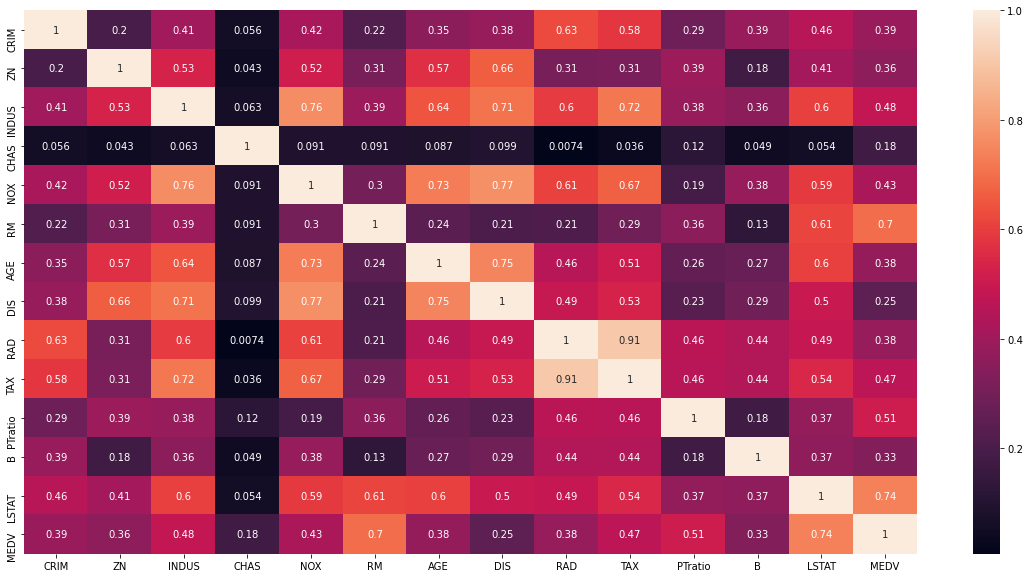

In [6]:
plt.figure(figsize=(20, 10))
sns.heatmap(datos.corr().abs(),  annot=True)

Como se puede observar, hay una alta relacion de las variables *LSTAT*, *RM* y *PTratio*, y la variable respuesta *MEDV*, lo que implica que estas variables son las que mas pesan en el valor de las viviendas.

## **Construccion del Modelo**

Se separan el valor del objeto (las variables a predecir).

In [7]:
train_labels=training.pop('MEDV')
test_labels=test.pop('MEDV')
train_stats = training.describe().transpose()

Normalizamos los datos para facilitar el entrenamiento, ya que las variables tienen diferentes estacalas de medidas.

In [8]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(training)
normed_test_data = norm(test)

## **Definicion del modelo**

Seleccionamos los hiperparametros y el optimizador de tal manera que se minimice el error absoluto medio.

In [9]:
# Define layers
model = keras.Sequential([
    layers.Dense(128,activation='relu', input_shape=(normed_train_data.shape[1],)),
    layers.Dropout(0.35),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae','mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


## **Entrenando el Modelo**

Se seleccionan 346 epocas para el entrenamiento del modelo y se toman el 20% de los datos de entrenamiento como validacion.

In [10]:
ciclos=346
history = model.fit(normed_train_data, 
                    train_labels,
                    epochs=ciclos, 
                    validation_split = 0.2, 
                    verbose=0)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,538.305115,21.473286,538.305115,564.396484,21.867191,564.396484,0
1,475.483978,19.955164,475.483978,488.836761,20.142406,488.836761,1
2,399.283600,18.000809,399.283600,387.836700,17.764856,387.836700,2
3,296.416351,15.178849,296.416351,266.287415,14.360570,266.287415,3
4,187.974197,11.654239,187.974197,147.283005,9.945683,147.283005,4
...,...,...,...,...,...,...,...
341,8.529290,2.144752,8.529290,10.527469,2.321449,10.527469,341
342,8.018039,2.114153,8.018039,9.577226,2.217408,9.577226,342
343,8.421040,2.107116,8.421040,10.299909,2.317085,10.299909,343
344,8.725819,2.188015,8.725819,9.701221,2.265486,9.701221,344


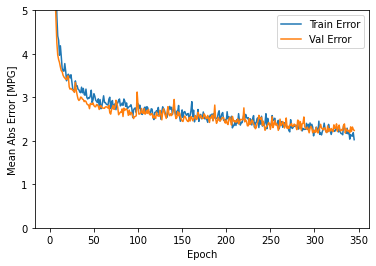

In [11]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.show()

plot_history(history)

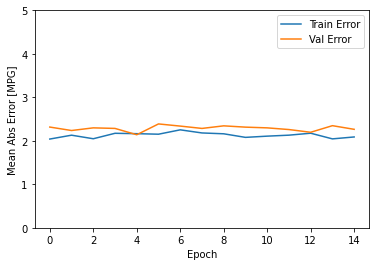

In [12]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=ciclos,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop])

plot_history(history)

In [13]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

4/4 - 0s - loss: 4.9847 - mae: 1.7544 - mse: 4.9847
Testing set Mean Abs Error:  1.75 MPG


Este grafico muestra muy buen resultado con 346 epocas, no se ve degradacion del modelo en ningun punto del diagrama, el error promedio generalmente es de alrededor de +/-1.75 MPG.

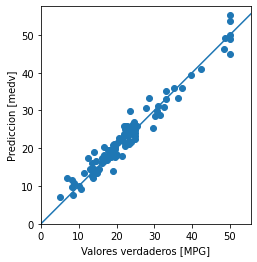

In [14]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('Valores verdaderos [MPG]')
plt.ylabel('Prediccion [medv]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Parece que el modelo predice bastante bien. La distribucion de los errores es la siguiente:

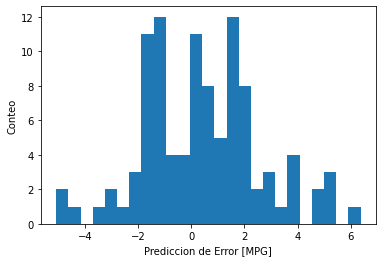

In [16]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediccion de Error [MPG]")
_ = plt.ylabel("Conteo")

## **Conclusion**
El modelo parece tener muy buena capacidad predictiva, los hiperparametros elegidos parecen ser una buena eleccion aunque como son valores arbitrarios no podemos estar seguros de que sea la mejor opcion.